In [6]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd

engine = create_engine("sqlite:///mta_data.db")
inspect(engine).get_table_names()

df = pd.read_sql('mta_data', engine)

In [4]:
df.head()

NameError: name 'df' is not defined

In [15]:
df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [7]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [17]:
#df["TIME"] = pd.to_datetime(df["TIME"]) #creates messy data & currently not using

In [9]:
df["YEAR"] = df.DATE.dt.year
df["MONTH"] = df.DATE.dt.month

In [19]:
df.info

<bound method DataFrame.info of             C/A  UNIT       SCP        STATION LINENAME DIVISION       DATE  \
0          A002  R051  02-00-00          59 ST  NQR456W      BMT 2021-05-22   
1          A002  R051  02-00-00          59 ST  NQR456W      BMT 2021-05-22   
2          A002  R051  02-00-00          59 ST  NQR456W      BMT 2021-05-22   
3          A002  R051  02-00-00          59 ST  NQR456W      BMT 2021-05-22   
4          A002  R051  02-00-00          59 ST  NQR456W      BMT 2021-05-22   
...         ...   ...       ...            ...      ...      ...        ...   
14096273  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-02-02   
14096274  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-02-02   
14096275  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-02-02   
14096276  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-02-02   
14096277  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-02-02   

              TIME 

In [10]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,YEAR,MONTH
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-22,00:00:00,REGULAR,7575503,2588978,2021,5
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-22,04:00:00,RECOVR AUD,7575515,2588982,2021,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-22,08:00:00,REGULAR,7575523,2588989,2021,5
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-22,12:00:00,REGULAR,7575557,2588996,2021,5
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-05-22,16:00:00,REGULAR,7575630,2589008,2021,5


In [11]:
df_mean = df.groupby(["YEAR","MONTH"]).mean()
df_mean

ENTRIES         EXITS
YEAR MONTH                            
2018 1      4.006838e+07  3.265705e+07
     2      3.956765e+07  3.198774e+07
     3      3.914348e+07  3.231529e+07
     4      3.878372e+07  3.216052e+07
     5      3.943173e+07  3.234379e+07
2019 1      4.023450e+07  3.309422e+07
     2      4.057879e+07  3.352928e+07
     3      4.055282e+07  3.336085e+07
     4      4.114357e+07  3.369742e+07
     5      4.148819e+07  3.402272e+07
2020 1      4.253357e+07  3.480452e+07
     2      4.270163e+07  3.510943e+07
     3      4.323133e+07  3.541999e+07
     4      4.341751e+07  3.559654e+07
     5      4.322193e+07  3.536711e+07
2021 1      4.246780e+07  3.411274e+07
     2      4.235972e+07  3.399872e+07
     3      4.203654e+07  3.381195e+07
     4      4.174835e+07  3.359502e+07
     5      4.193675e+07  3.368418e+07

In [9]:
df_roll_mean = df.groupby(["YEAR","MONTH"]).rolling(30).agg("mean")
df_roll_mean = df_roll_mean.reset_index()
df_roll_mean

,YEAR,MONTH,level_2,ENTRIES,EXITS
0,2018,1,13896890,NaN,NaN
1,2018,1,13896891,NaN,NaN
2,2018,1,13896892,NaN,NaN
3,2018,1,13896893,NaN,NaN
4,2018,1,13896894,NaN,NaN
...,...,...,...,...,...
14096273,2021,5,836436,5554.0,547.0
14096274,2021,5,836437,5554.0,547.0
14096275,2021,5,836438,5554.0,547.0
14096276,2021,5,836439,5554.0,547.0


In [23]:
df_roll_mean_unique = df_roll_mean.drop_duplicates(subset = ["YEAR","MONTH","ENTRIES","EXITS"])
df_roll_mean_unique

,YEAR,MONTH,level_2,ENTRIES,EXITS
0,2019,1,10534824,NaN,NaN
29,2019,1,10534853,6.924926e+06,2.348509e+06
30,2019,1,10534854,6.925112e+06,2.348576e+06
31,2019,1,10534855,6.925298e+06,2.348643e+06
32,2019,1,10534856,6.925486e+06,2.348717e+06
...,...,...,...,...,...
10737719,2021,5,836424,5.244633e+03,4.823333e+02
10737720,2021,5,836425,5.322000e+03,4.985000e+02
10737721,2021,5,836426,5.399333e+03,5.146667e+02
10737722,2021,5,836427,5.476667e+03,5.308333e+02


In [19]:
#df_roll_mean = df_roll_mean.reset_index()
feb_2019 = df_roll_mean.iloc[0:1]
feb_2019
mar_2019 = df_roll_mean.iloc[894813:894814]
apr_2019 = df_roll_mean.iloc[1789624:1789625]
may_2019 = df_roll_mean.iloc[2684435:2684436]

mar_2019
apr_2019
may_2019


,index,YEAR,MONTH,level_2,ENTRIES,EXITS
2684435,2684435,2019,4,8797704,1.658671e+07,11891566.0


In [10]:
df_mmyyyy = df.groupby(["YEAR","MONTH"]).rolling(30).apply(lambda x: x.iloc[1] - x.iloc[0])
df_mmyyyy


ENTRIES  EXITS
YEAR MONTH                         
2019 1     10534824      NaN    NaN
           10534825      NaN    NaN
           10534826      NaN    NaN
           10534827      NaN    NaN
           10534828      NaN    NaN
...                      ...    ...
2021 5     836436        0.0    0.0
           836437        0.0    0.0
           836438        0.0    0.0
           836439        0.0    0.0
           836440        0.0    0.0

[10737736 rows x 2 columns]

In [24]:
df_mmyyyy_2 = df.groupby(["MONTH","YEAR"]).rolling(30).apply(lambda x: x.iloc[1] - x.iloc[0])
df_mmyyyy_2

ENTRIES  EXITS
MONTH YEAR                         
1     2019 10534824      NaN    NaN
           10534825      NaN    NaN
           10534826      NaN    NaN
           10534827      NaN    NaN
           10534828      NaN    NaN
...                      ...    ...
5     2021 836436        0.0    0.0
           836437        0.0    0.0
           836438        0.0    0.0
           836439        0.0    0.0
           836440        0.0    0.0

[10737736 rows x 2 columns]

In [62]:
df_mmYYYY_3 = df.ENTRIES.rolling(30).mean()
df_mmYYYY_3

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
             ...  
10737731    5554.0
10737732    5554.0
10737733    5554.0
10737734    5554.0
10737735    5554.0
Name: ENTRIES, Length: 10737736, dtype: float64

In [10]:
df_mmYYYY_4 = df.groupby(['YEAR','MONTH']).ENTRIES.max()
df_mmYYYY_4

YEAR  MONTH
2018  1        2130112859
      2        2130105256
      3        2130060231
      4        2130007345
      5        2129955393
2019  1        2129506448
      2        2129495848
      3        2129448206
      4        2129392693
      5        2129336256
2020  1        2128847805
      2        2128833592
      3        2128785460
      4        2128763817
      5        2128762657
2021  1        2128713665
      2        2128713397
      3        2128707477
      4        2147432317
      5        2147427392
Name: ENTRIES, dtype: int64

In [15]:
df_station_yr = df.groupby(["STATION","YEAR"]).mean("ENTRIES")

In [16]:
df_station_yr

ENTRIES         EXITS     MONTH
STATION   YEAR                                      
1 AV      2019  1.415304e+08  1.465779e+08  3.320273
          2020  7.527456e+06  8.070031e+06  3.422808
          2021  1.930698e+07  1.945399e+07  3.371249
103 ST    2019  6.961499e+07  8.755350e+07  3.328297
          2020  8.976997e+06  7.823057e+06  3.410363
...                      ...           ...       ...
YORK ST   2020  1.523030e+07  1.200319e+07  3.410714
          2021  9.916975e+06  3.150153e+06  3.373267
ZEREGA AV 2019  2.884097e+05  1.299330e+05  3.317460
          2020  4.192334e+05  2.541787e+05  3.410714
          2021  4.619493e+05  3.056671e+05  3.374751

[1134 rows x 3 columns]

In [13]:
df_yr = df.groupby("YEAR").mean("ENTRIES")
df_yr

,ENTRIES,EXITS,MONTH
YEAR,,,
2018,3.925277e+07,3.221948e+07,3.350038
2019,4.088207e+07,3.360650e+07,3.323453
2020,4.311314e+07,3.534437e+07,3.360400
2021,4.202365e+07,3.377615e+07,3.454040


In [14]:
df_yr_entries = df_yr.iloc[:,:1]
df_yr_entries["Δ prev year"] = ["-",(df_yr_entries.iloc[1,0]-df_yr_entries.iloc[0,0]),(df_yr_entries.iloc[2,0]-df_yr_entries.iloc[1,0]),(df_yr_entries.iloc[3,0]-df_yr_entries.iloc[2,0])]
df_yr_entries["Δ since 2018"] = ["-",(df_yr_entries.iloc[1,0]-df_yr_entries.iloc[0,0]),(df_yr_entries.iloc[2,0]-df_yr_entries.iloc[0,0]),(df_yr_entries.iloc[3,0]-df_yr_entries.iloc[0,0])]
df_yr_entries

<ipython-input-14-995d9f8765ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yr_entries["Δ prev year"] = ["-",(df_yr_entries.iloc[1,0]-df_yr_entries.iloc[0,0]),(df_yr_entries.iloc[2,0]-df_yr_entries.iloc[1,0]),(df_yr_entries.iloc[3,0]-df_yr_entries.iloc[2,0])]


,ENTRIES,Δ prev year,Δ since 2018
YEAR,,,
2018,3.925277e+07,-,-
2019,4.088207e+07,1629301.328971,1629301.328971
2020,4.311314e+07,2231064.326013,3860365.654984
2021,4.202365e+07,-1089490.999768,2770874.655215


In [25]:
df_yr_2 = df.groupby("YEAR").ENTRIES.mean()
df_yr_2

YEAR
2018    3.925277e+07
2019    4.088207e+07
2020    4.311314e+07
2021    4.202365e+07
Name: ENTRIES, dtype: float64

In [26]:
df_year_3 = df.groupby("YEAR").ENTRIES.sum()
df_year_3

YEAR
2018    131832087872725
2019    141770531474115
2020    160187557739288
2021    149370031089834
Name: ENTRIES, dtype: int64

In [15]:
#COVID Data for NYC: https://news.google.com/covid19/map?hl=en-US&mid=%2Fm%2F02_286&gl=US&ceid=US%3Aen&state=1
diff_2021 = 949153 - 430835 #cumulative of May 2021 - cumulative of Dec 31, 2020
covid_dict = {"May_2018":0,"May_2019":0,"May_2020":207539,"May_2021":diff_2021}
covid_dict

{'May_2018': 0, 'May_2019': 0, 'May_2020': 207539, 'May_2021': 518318}

In [16]:
x = [df_yr_entries.iloc[0,0],df_yr_entries.iloc[1,0],df_yr_entries.iloc[2,0],df_yr_entries.iloc[3,0]]
print(x)

[39252773.33817025, 40882074.66714122, 43113138.993154116, 42023647.99338572]


In [17]:
y = covid_dict.values()
val = ["Feb - May 2018","Feb - May 2019","Feb - May 2020","Feb - May 2021"]

In [18]:
import matplotlib.pyplot as plt

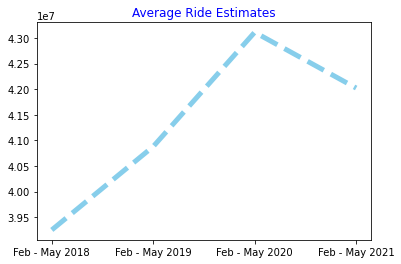

In [24]:
plt.plot(val,x,linewidth=5,color="skyblue",linestyle = '--')
plt.title("Average Ride Estimates",loc = "center", color = "blue");

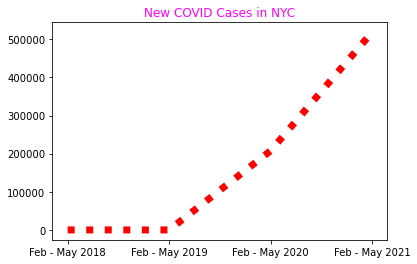

In [26]:
plt.plot(val,y,color="red",linewidth = 7,linestyle = "dotted")
plt.title("New COVID Cases in NYC",loc = "center", color = "magenta");